## Kobe Bryant Shot Selection - probability

Will Kobe Bryant score? 
Let's have a look at data set with all shots Kobe has done through his career to find out
I will use Logistic Regression to evaluate success rate

More details about deta set under below link:

[Kobe Bryant Shot Selection](https://www.kaggle.com/c/kobe-bryant-shot-selection)



In [50]:
# import needed libraries
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
# loading dataset 
df = DataFrame(pd.read_csv("../input/data.csv"))

## 1. Data understanding

In [52]:
# samples of data
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [53]:
# data frame dimension
df.shape

(30697, 25)

In [54]:
# data types of features
df.dtypes

action_type            object
combined_shot_type     object
game_event_id           int64
game_id                 int64
lat                   float64
loc_x                   int64
loc_y                   int64
lon                   float64
minutes_remaining       int64
period                  int64
playoffs                int64
season                 object
seconds_remaining       int64
shot_distance           int64
shot_made_flag        float64
shot_type              object
shot_zone_area         object
shot_zone_basic        object
shot_zone_range        object
team_id                 int64
team_name              object
game_date              object
matchup                object
opponent               object
shot_id                 int64
dtype: object

In [55]:
# numeric features description
df.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
count,30697.000000,3.069700e+04,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,25697.000000,3.069700e+04,30697.000000
mean,249.190800,2.476407e+07,33.953192,7.110499,91.107535,-118.262690,4.885624,2.519432,0.146562,28.365085,13.437437,0.446161,1.610613e+09,15349.000000
std,150.003712,7.755175e+06,0.087791,110.124578,87.791361,0.110125,3.449897,1.153665,0.353674,17.478949,9.374189,0.497103,0.000000e+00,8861.604943
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,1.000000
25%,110.000000,2.050008e+07,33.884300,-68.000000,4.000000,-118.337800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7675.000000
50%,253.000000,2.090035e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15349.000000
75%,368.000000,2.960047e+07,34.040300,95.000000,160.000000,-118.174800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,23023.000000
max,659.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000


In [56]:
# Data Frame with null value information
nulls_summary = pd.DataFrame(df.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df.isnull().mean()*100),2)
nulls_summary

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
action_type,False,0,0.00
combined_shot_type,False,0,0.00
game_event_id,False,0,0.00
game_id,False,0,0.00
lat,False,0,0.00
loc_x,False,0,0.00
loc_y,False,0,0.00
lon,False,0,0.00
minutes_remaining,False,0,0.00
period,False,0,0.00


In [57]:
# outliers
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

low_boundary = q1-1.5*iqr
upp_boundary = q3+1.5*iqr
num_of_out_L = (df[iqr.index] < low_boundary).sum()
num_of_out_U = (df[iqr.index] > upp_boundary).sum()

outliers = pd.DataFrame({"lower_value":low_boundary, "upper_boundary":upp_boundary,
                        "num_of_outliers_L":num_of_out_L, "num_of_outliers_U":num_of_out_U})
outliers

,lower_value,upper_boundary,num_of_outliers_L,num_of_outliers_U
game_event_id,-2.770000e+02,7.550000e+02,0,0
game_id,6.849482e+06,4.325107e+07,0,667
lat,3.365030e+01,3.427430e+01,87,0
loc_x,-3.125000e+02,3.395000e+02,0,0
loc_y,-2.300000e+02,3.940000e+02,0,87
lon,-1.185823e+02,-1.179303e+02,0,0
minutes_remaining,-7.000000e+00,1.700000e+01,0,0
period,-2.000000e+00,6.000000e+00,0,7
playoffs,0.000000e+00,0.000000e+00,0,4499
seconds_remaining,-3.200000e+01,8.800000e+01,0,0


In [58]:
# categorical features
df.select_dtypes(["object", "category"]).columns

Index(['action_type', 'combined_shot_type', 'season', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'team_name',
       'game_date', 'matchup', 'opponent'],
      dtype='object')

In [59]:
# categorical features values
for col in df.select_dtypes(["object", "category"]).drop(["season", "team_name", "game_date", "matchup"], axis=1):
    print(df[col].value_counts())
    print("\nUnique values:", len(df[col].unique()))
    print("-"*40)

Jump Shot                             18880
Layup Shot                             2567
Driving Layup Shot                     1978
Turnaround Jump Shot                   1057
Fadeaway Jump Shot                     1048
Running Jump Shot                       926
Pullup Jump shot                        476
Turnaround Fadeaway shot                439
Slam Dunk Shot                          411
Reverse Layup Shot                      395
Jump Bank Shot                          333
Driving Dunk Shot                       310
Dunk Shot                               262
Tip Shot                                182
Alley Oop Dunk Shot                     122
Step Back Jump shot                     118
Floating Jump shot                      114
Driving Reverse Layup Shot               97
Hook Shot                                84
Driving Finger Roll Shot                 82
Alley Oop Layup shot                     80
Reverse Dunk Shot                        75
Running Layup Shot              

In [60]:
# numeric variables
df.select_dtypes(["float","int",'int64', "float64"]).columns 

Index(['game_event_id', 'game_id', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'seconds_remaining',
       'shot_distance', 'shot_made_flag', 'team_id', 'shot_id'],
      dtype='object')

In [61]:
# correlation between numeric features

pd.DataFrame(np.corrcoef(df.fillna(0).select_dtypes(['float', 'float64', 'int', 'int64']), rowvar=0), 
             columns=df.select_dtypes(["float", 'float64', "int", 'int64']).columns,
             index=df.select_dtypes(["float", 'float64', "int", 'int64']).columns)

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id
game_event_id,1.000000,-0.002553,-0.060091,-0.028404,0.060091,-0.028404,-0.270736,0.956042,-0.004507,-0.021293,0.062077,-0.031167,NaN,0.028478
game_id,-0.002553,1.000000,0.013021,-0.019553,-0.013021,-0.019553,0.014481,0.009879,0.917235,-0.007107,-0.030327,-0.003671,NaN,0.761656
lat,-0.060091,0.013021,1.000000,0.016217,-1.000000,0.016217,0.071462,-0.041248,-0.001143,0.052714,-0.818517,0.126582,NaN,-0.030790
loc_x,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000463,NaN,-0.019917
loc_y,0.060091,-0.013021,-1.000000,-0.016217,1.000000,-0.016217,-0.071462,0.041248,0.001143,-0.052714,0.818517,-0.126582,NaN,0.030790
lon,-0.028404,-0.019553,0.016217,1.000000,-0.016217,1.000000,0.006898,-0.028165,-0.012790,0.001083,0.022654,-0.000463,NaN,-0.019917
minutes_remaining,-0.270736,0.014481,0.071462,0.006898,-0.071462,0.006898,1.000000,-0.043425,0.015101,0.025558,-0.059767,0.024661,NaN,-0.005731
period,0.956042,0.009879,-0.041248,-0.028165,0.041248,-0.028165,-0.043425,1.000000,0.008789,0.005832,0.046993,-0.026694,NaN,0.000364
playoffs,-0.004507,0.917235,-0.001143,-0.012790,0.001143,-0.012790,0.015101,0.008789,1.000000,-0.002490,-0.008667,-0.001776,NaN,0.612571
seconds_remaining,-0.021293,-0.007107,0.052714,0.001083,-0.052714,0.001083,0.025558,0.005832,-0.002490,1.000000,-0.051482,0.024202,NaN,-0.004868


In [62]:
# data frame general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 25 columns):
action_type           30697 non-null object
combined_shot_type    30697 non-null object
game_event_id         30697 non-null int64
game_id               30697 non-null int64
lat                   30697 non-null float64
loc_x                 30697 non-null int64
loc_y                 30697 non-null int64
lon                   30697 non-null float64
minutes_remaining     30697 non-null int64
period                30697 non-null int64
playoffs              30697 non-null int64
season                30697 non-null object
seconds_remaining     30697 non-null int64
shot_distance         30697 non-null int64
shot_made_flag        25697 non-null float64
shot_type             30697 non-null object
shot_zone_area        30697 non-null object
shot_zone_basic       30697 non-null object
shot_zone_range       30697 non-null object
team_id               30697 non-null int64
team_name         

## 2. Data Engineering

In [63]:
# action_type feature has 57 unique values
# 98% of shots is assigned to 22 only
action_df = pd.DataFrame([df['action_type'].value_counts(),
             df['action_type'].value_counts().cumsum()/df['action_type'].value_counts().sum()],
            index=["action_type", "action_type_per"]).transpose()

common_shots = action_df[action_df["action_type_per"]<0.98].index

print(len(common_shots))
print(common_shots)

22
Index(['Jump Shot', 'Layup Shot', 'Driving Layup Shot', 'Turnaround Jump Shot',
       'Fadeaway Jump Shot', 'Running Jump Shot', 'Pullup Jump shot',
       'Turnaround Fadeaway shot', 'Slam Dunk Shot', 'Reverse Layup Shot',
       'Jump Bank Shot', 'Driving Dunk Shot', 'Dunk Shot', 'Tip Shot',
       'Alley Oop Dunk Shot', 'Step Back Jump shot', 'Floating Jump shot',
       'Driving Reverse Layup Shot', 'Hook Shot', 'Driving Finger Roll Shot',
       'Alley Oop Layup shot', 'Reverse Dunk Shot'],
      dtype='object')


In [64]:
# values to be replaced with more frequent
action_df[action_df["action_type_per"]>0.98].index

Index(['Running Layup Shot', 'Turnaround Bank shot',
       'Driving Finger Roll Layup Shot', 'Driving Slam Dunk Shot',
       'Running Bank shot', 'Running Hook Shot', 'Finger Roll Layup Shot',
       'Fadeaway Bank shot', 'Driving Jump shot', 'Finger Roll Shot',
       'Jump Hook Shot', 'Running Dunk Shot', 'Reverse Slam Dunk Shot',
       'Follow Up Dunk Shot', 'Putback Layup Shot', 'Driving Hook Shot',
       'Turnaround Hook Shot', 'Pullup Bank shot',
       'Running Reverse Layup Shot', 'Cutting Layup Shot',
       'Running Finger Roll Layup Shot', 'Hook Bank Shot', 'Putback Dunk Shot',
       'Driving Bank shot', 'Driving Floating Jump Shot',
       'Running Finger Roll Shot', 'Running Pull-Up Jump Shot',
       'Running Tip Shot', 'Tip Layup Shot', 'Turnaround Finger Roll Shot',
       'Putback Slam Dunk Shot', 'Driving Floating Bank Jump Shot',
       'Turnaround Fadeaway Bank Jump Shot', 'Running Slam Dunk Shot',
       'Cutting Finger Roll Layup Shot'],
      dtype='object')

In [65]:
# replacing values to more popular 
df["action_type"] = df["action_type"].replace('Driving Finger Roll Layup Shot', 'Driving Layup Shot')
df["action_type"] = df["action_type"].replace('Turnaround Bank shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Running Layup Shot', 'Driving Layup Shot')
df["action_type"] = df["action_type"].replace('Driving Slam Dunk Shot', 'Slam Dunk Shot')
df["action_type"] = df["action_type"].replace('Running Bank shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Running Hook Shot', 'Hook Shot')
df["action_type"] = df["action_type"].replace('Fadeaway Bank shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Finger Roll Shot', 'Driving Finger Roll Shot')
df["action_type"] = df["action_type"].replace('Driving Jump shot', 'Running Jump Shot')
df["action_type"] = df["action_type"].replace('Jump Hook Shot', 'Hook Shot')
df["action_type"] = df["action_type"].replace('Running Dunk Shot', 'Driving Dunk Shot')
df["action_type"] = df["action_type"].replace('Reverse Slam Dunk Shot', 'Reverse Dunk Shot')
df["action_type"] = df["action_type"].replace('Driving Hook Shot', 'Hook Shot')
df["action_type"] = df["action_type"].replace('Pullup Bank shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Follow Up Dunk Shot', 'Dunk Shot')
df["action_type"] = df["action_type"].replace('Putback Layup Shot', 'Layup Shot')
df["action_type"] = df["action_type"].replace('Turnaround Hook Shot', 'Hook Shot')
df["action_type"] = df["action_type"].replace('Running Reverse Layup Shot', 'Reverse Layup Shot')
df["action_type"] = df["action_type"].replace('Cutting Layup Shot', 'Layup Shot')
df["action_type"] = df["action_type"].replace('Running Finger Roll Layup Shot', 'Layup Shot')
df["action_type"] = df["action_type"].replace('Hook Bank Shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Running Finger Roll Shot', 'Driving Finger Roll Shot')
df["action_type"] = df["action_type"].replace('Putback Dunk Shot', 'Driving Layup Shot')
df["action_type"] = df["action_type"].replace('Driving Floating Jump Shot', 'Floating Jump shot')
df["action_type"] = df["action_type"].replace('Driving Bank shot', 'Jump Bank Shot')
df["action_type"] = df["action_type"].replace('Running Pull-Up Jump Shot', 'Pullup Jump shot')
df["action_type"] = df["action_type"].replace('Turnaround Finger Roll Shot', 'Driving Finger Roll Shot')
df["action_type"] = df["action_type"].replace('Tip Layup Shot', 'Layup Shot')
df["action_type"] = df["action_type"].replace('Putback Slam Dunk Shot', 'Slam Dunk Shot')
df["action_type"] = df["action_type"].replace('Running Tip Shot', 'Tip Shot')
df["action_type"] = df["action_type"].replace('Running Slam Dunk Shot', 'Slam Dunk Shot')
df["action_type"] = df["action_type"].replace('Driving Floating Bank Jump Shot', 'Floating Jump shot')
df["action_type"] = df["action_type"].replace('Cutting Finger Roll Layup Shot', 'Layup Shot')
df["action_type"] = df["action_type"].replace('Turnaround Fadeaway Bank Jump Shot', 'Turnaround Jump Shot')
df["action_type"] = df["action_type"].replace('Finger Roll Layup Shot', 'Layup Shot')

In [66]:
# reduced list of action types
print(df["action_type"].unique())
print(len(df["action_type"].unique()))

['Jump Shot' 'Driving Dunk Shot' 'Layup Shot' 'Running Jump Shot'
 'Driving Layup Shot' 'Reverse Layup Shot' 'Reverse Dunk Shot'
 'Slam Dunk Shot' 'Turnaround Jump Shot' 'Tip Shot' 'Hook Shot'
 'Alley Oop Dunk Shot' 'Dunk Shot' 'Alley Oop Layup shot'
 'Driving Finger Roll Shot' 'Fadeaway Jump Shot' 'Jump Bank Shot'
 'Pullup Jump shot' 'Turnaround Fadeaway shot'
 'Driving Reverse Layup Shot' 'Step Back Jump shot' 'Floating Jump shot']
22


In [67]:
# test set is created with records without shot_made_flag assigned
# this is what I am going to predict
test = df[df["shot_made_flag"].isnull()].copy()

# dimension of test set
test.shape

(5000, 25)

In [68]:
# Reomve samples which will be used for testing model
df.dropna(inplace=True)

In [69]:
# zones columns extraction for visualization
zones = []
for label in df.columns:
    if "_zone_" in label:
        zones.append(label)
    
zones

['shot_zone_area', 'shot_zone_basic', 'shot_zone_range']

Percentage of missed shots 55.38
Percentage of scored shots 44.62


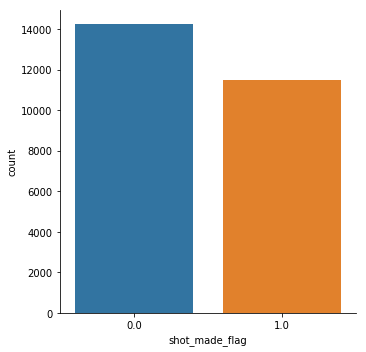

In [70]:
# Visualization
# percentage on missed and scored shots
print("Percentage of missed shots", round(df["shot_made_flag"].value_counts(normalize=True)[0]*100, 2))
print("Percentage of scored shots", round(df["shot_made_flag"].value_counts(normalize=True)[1]*100, 2))
sns.factorplot("shot_made_flag", data=df, kind="count")

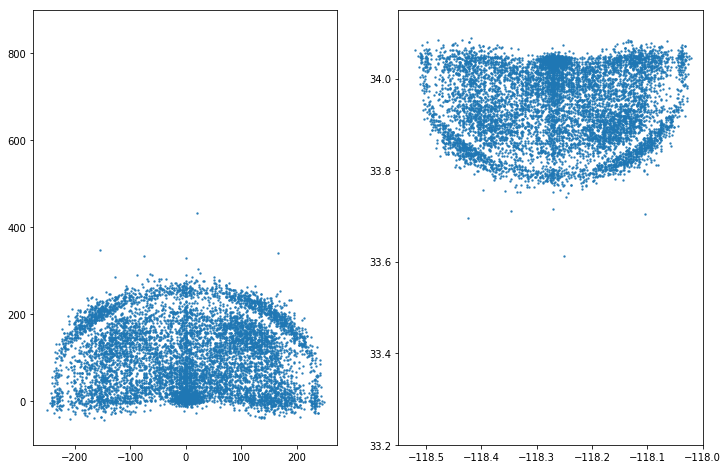

In [71]:
# plotting figures of scored shots
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.ylim(-100, 900)
sns.regplot(df.loc[(df["shot_made_flag"]==1), ["loc_x"]], df.loc[(df["shot_made_flag"]==1), ["loc_y"]], df, fit_reg=False, scatter_kws={"s":2})
# sns.regplot(df.loc[(df["shot_made_flag"]==0), ["loc_x"]], df.loc[(df["shot_made_flag"]==0), ["loc_y"]], df, fit_reg=False, scatter_kws={"s":2, "color":"indianred", "alpha":0.6})

plt.subplot(122)
plt.ylim(33.20, 34.15)
plt.xlim(-118.55, -118.0)
sns.regplot(df.loc[(df["shot_made_flag"]==1), ["lon"]], df.loc[(df["shot_made_flag"]==1), ["lat"]], df, fit_reg=False, scatter_kws={"s":2})

# as saw in correlation date frame features loc_x, loc_y and lon, lat keeping same information

In [72]:
# function for plotting shots divided into zones
def plot_shot_zones(plot_zone, y=0.75):
    colors = ["red", "blue", "yellow", "green", "purple", "black", "pink", "orange"]
    ranges = df[plot_zone].unique()
    
    plt.figure(figsize=(8, 10))
    plt.ylim(-100, 800)

    for range_, color in zip(ranges, colors):
        s = df[df[plot_zone]==range_]
        sns.regplot(s["loc_x"], s["loc_y"], df, fit_reg=False, scatter_kws={"s": 2, "color": color})
        plt.text(s["loc_x"].mean(), 
                 s["loc_y"].quantile(y), 
                 s=round(s["shot_made_flag"].value_counts(normalize=True)[1], 3), 
                 bbox=dict(facecolor='red', alpha=0.7), 
                 color="white", 
                 weight="bold", 
                 size=11)

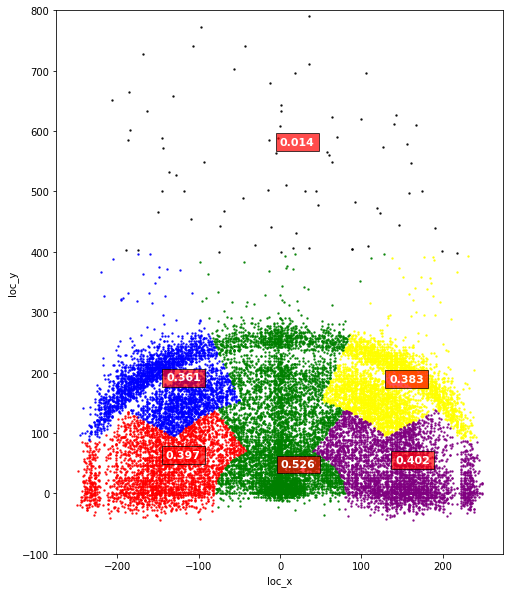

In [73]:
plot_shot_zones(zones[0], y=0.6)

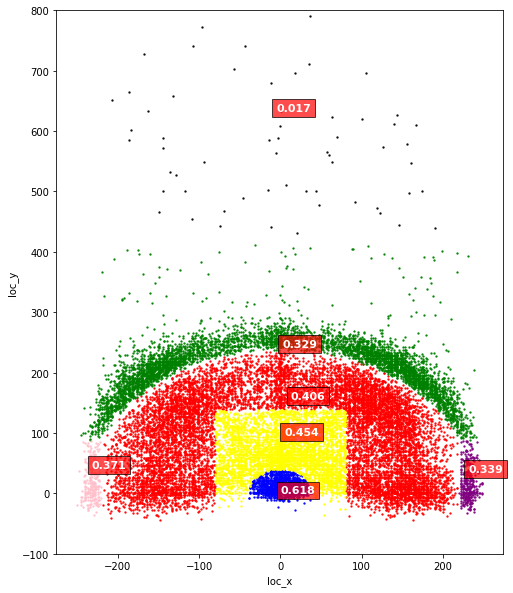

In [74]:
plot_shot_zones(zones[1])

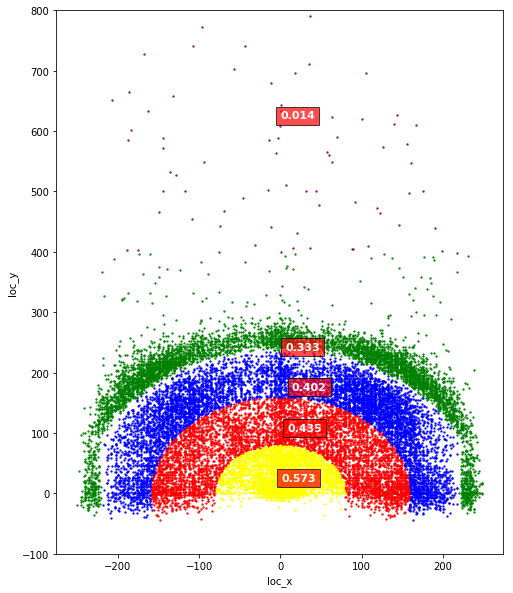

In [75]:
plot_shot_zones(zones[2])

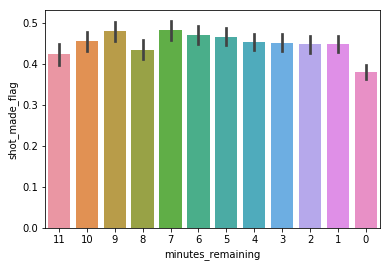

In [76]:
# shot accuracy in time
order = list(range(11, -1, -1))
sns.barplot("minutes_remaining", "shot_made_flag", data=df, order=order)

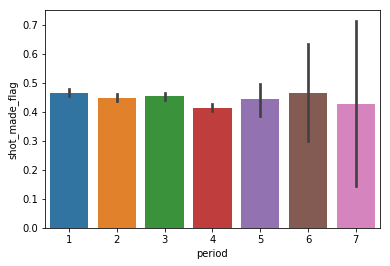

In [77]:
# shot accuracy per period
sns.barplot("period", "shot_made_flag", data=df)

Number of played 5 periods: 280
Number of played 6 periods: 30
Number of played 7 periods: 7


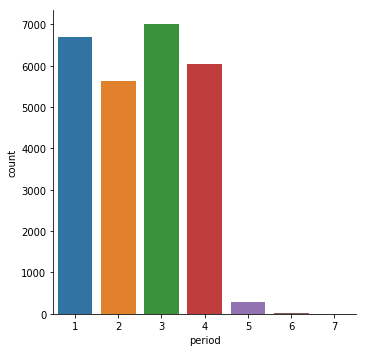

In [78]:
# number of period played
sns.factorplot("period", data=df, kind="count")
print("Number of played 5 periods: {}".format(int(df[df["period"]==5]["period"].value_counts().max())))
print("Number of played 6 periods: {}".format(int(df[df["period"]==6]["period"].value_counts().max())))
print("Number of played 7 periods: {}".format(int(df[df["period"]==7]["period"].value_counts().max())))

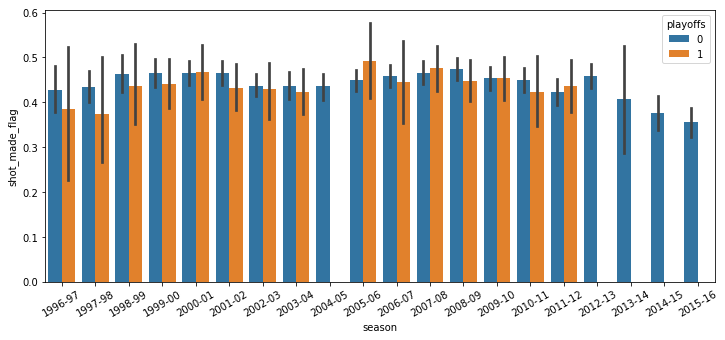

In [79]:
# accuracy per season per game type (playoff or regular)
labels = np.concatenate((df["season"].unique()[-4:], df["season"].unique()[:-4]))

plt.figure(figsize=(12, 5))
plt.xticks(rotation=30)
sns.barplot("season", "shot_made_flag", data=df, order=labels, hue="playoffs")

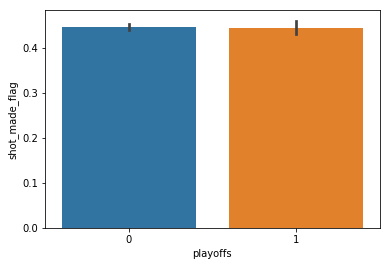

In [80]:
# accuracy during regular season and playoffs
sns.barplot("playoffs", "shot_made_flag", data=df)

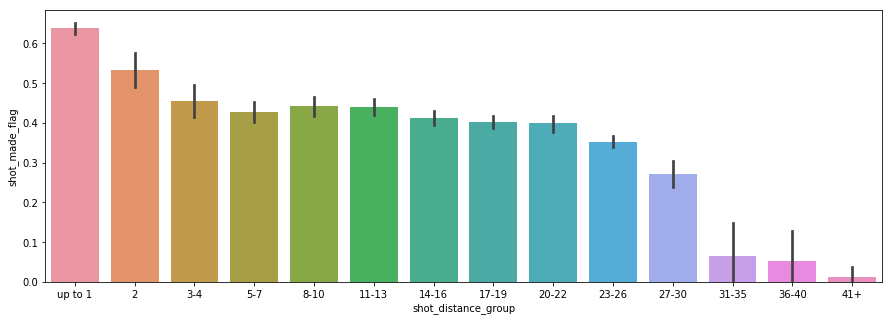

In [81]:
# accuracy per distance to basket in bins, the further the lower - as expected
plt.figure(figsize=(15,5))

bins = [-1, 1.5, 2.5, 4.5, 7.5, 10.5, 13.5, 16.5, 19.5, 22.5, 26.5, 30.5, 35.5, 40.5, np.inf]
labels = ["up to 1", "2", "3-4", "5-7", "8-10", "11-13", "14-16", "17-19", "20-22", "23-26", "27-30", "31-35", "36-40", "41+"]

df["shot_distance_group"] = pd.cut(df["shot_distance"], bins=bins, labels=labels)
test["shot_distance_group"] = pd.cut(test["shot_distance"], bins=bins, labels=labels)

sns.barplot("shot_distance_group", "shot_made_flag", data=df)

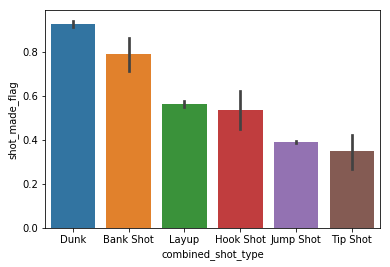

In [82]:
# accuracy per combined shot type
order = df.groupby(["combined_shot_type"])["shot_made_flag"].mean().sort_values(ascending=False).index

sns.barplot("combined_shot_type", "shot_made_flag", data=df, order=order)

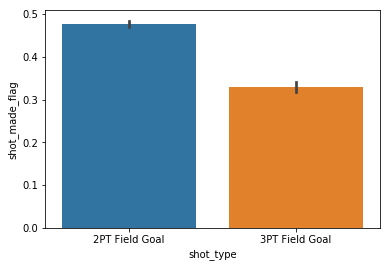

In [83]:
# accuracy for 2 and 3 points shots
sns.barplot("shot_type", "shot_made_flag", data=df)

In [84]:
# combine remaining minutes and seconds into one feature
df["time_remaining"] = df["minutes_remaining"]*60 + df["seconds_remaining"]
test["time_remaining"] = test["minutes_remaining"]*60 + test["seconds_remaining"]

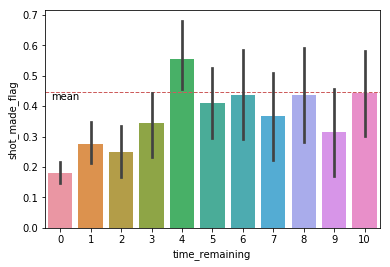

In [85]:
# accuracy for last seconds of each game
plt.hlines(df["shot_made_flag"].mean(), xmin=-0.5, xmax=10.5, linestyles="--", colors="indianred", lw=1)
plt.text(-0.3, df["shot_made_flag"].mean(), "mean", ha="left", va="top")
sns.barplot(df[df["time_remaining"]<=10]["time_remaining"], "shot_made_flag", data=df)

In [86]:
# separate feature for shots in last seconds
df["over4sec"] = df["time_remaining"].apply(lambda x: 1 if x>3 else 0)
test["over4sec"] = test["time_remaining"].apply(lambda x: 1 if x>3 else 0)

In [87]:
df["shot_distance_group"] = df["shot_distance_group"].astype("object")
test["shot_distance_group"] = test["shot_distance_group"].astype("object")

In [88]:
# target and predictors 
y = df["shot_made_flag"]

predictors = df.drop(['game_event_id', 
                      'game_id', 
                      'lat', 'lon', 
                      'minutes_remaining', 
                      'season', 
                      'seconds_remaining', 
                      'team_id', 
                      'team_name', 
                      'game_date', 
                      'matchup', 
                      'opponent', 
                      'shot_id',
                      'shot_distance_group',
                      'shot_made_flag',
                      'shot_zone_range',
                      'combined_shot_type'
                      ], axis=1).columns

In [89]:
# dimension of one hot data frames
print(df.shape)
print(test.shape)

# one hot table with combined with train and test data frames
dummies = pd.get_dummies(pd.concat([df[predictors], test[predictors]], axis=0))

(25697, 28)
(5000, 28)


In [90]:
# split to train and test sets
X = dummies[:df.shape[0]]
test_df = dummies[df.shape[0]:]

In [91]:
# one hot table dimension
print(X.shape)
print(test_df.shape)

(25697, 44)
(5000, 44)


## 3. Machine Learning

In [92]:
# Machine Lerning model - Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

In [93]:
folds = KFold(5, shuffle=True, random_state=44)

In [94]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()

params = {
    "C": [1, 2, 4, 7, 10],
    "solver": ['liblinear'],
         }

clf = GridSearchCV(lr, params, cv=folds, n_jobs=-1, scoring="neg_log_loss")
clf.fit(X, y)

print(-clf.best_score_)
print(clf.best_params_)

0.6107332928551564
{'C': 7, 'solver': 'liblinear'}


In [95]:
lr_model = LogisticRegression(**clf.best_params_)

In [96]:
lr_model.fit(X, y)
lr_preds = lr_model.predict_proba(test_df)

In [97]:
results = pd.DataFrame(data={"shot_id": test["shot_id"].values, 
                             "shot_made_flag": lr_preds[:,1]}
                             )
results.head()

,shot_id,shot_made_flag
0,1,0.357052
1,8,0.321042
2,17,0.563215
3,20,0.749976
4,33,0.353915


## 4. File submission and final score

In [98]:
results.to_csv("lr_liblinear.csv", index=False)

#Kaggle score 0.61092